### Data Shifting Experiment

### BRSET

* [Dataset](https://physionet.org/content/brazilian-ophthalmological/1.0.0/)

* [Original Paper](https://www.medrxiv.org/content/10.1101/2024.01.23.24301660v1)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results, update_column_names

In [3]:
PATH = 'Embeddings/brset/'
FILE = 'embeddings.csv'
DATASET = 'BRSET'

batch_size = 32

output_size = 1
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.DR_3 = df.DR_3.astype(str)
df.head()

DR_ICDR  DR_2 DR_3  split    text_1    text_2    text_3    text_4  \
0        0     0    0  train -0.230976 -0.649306  0.351964  4.827357   
1        0     0    0   test -0.188945 -0.516513  0.458152  4.739528   
2        0     0    0  train -0.690169 -0.710446  0.562674  4.909813   
3        0     0    0  train -0.748607 -0.507840  0.673932  4.859914   
4        0     0    0   test -0.575935 -0.649872  0.722284  5.002320   

     text_5    text_6  ...  image_1526  image_1527  image_1528  image_1529  \
0 -0.652423 -1.548302  ...   -0.321200   -1.895818    1.196687    1.986741   
1 -0.524881 -1.532104  ...   -0.007468   -1.980681    1.131782    1.909355   
2 -0.266062 -1.765767  ...   -0.016114   -1.694332    1.244229    2.120176   
3 -0.071180 -1.733303  ...    0.268266   -1.657310    0.901805    1.809422   
4 -0.277846 -1.737345  ...    0.141679   -1.476505    1.064863    2.015743   

   image_1530  image_1531  image_1532  image_1533  image_1534  image_1535  
0    1.047986    1.503189    2.945741    2.566396    0.100422    0.039841  
1    1.482123    1.014651    2.604582    2.267700    0.133543   -0.243325  
2    1.228228    1.084082    2.284241    2.441288    0.548136   -0.184525  
3    1.395210    0.949156    2.093713    2.066097    0.544640   -0.578559  
4    1.148500    1.598261    2.477580    2.682755   -0.003177   -0.187033  

[5 rows x 5636 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'DR_2'

### Run Experiments

##################################################  Shift -1  ##################################################


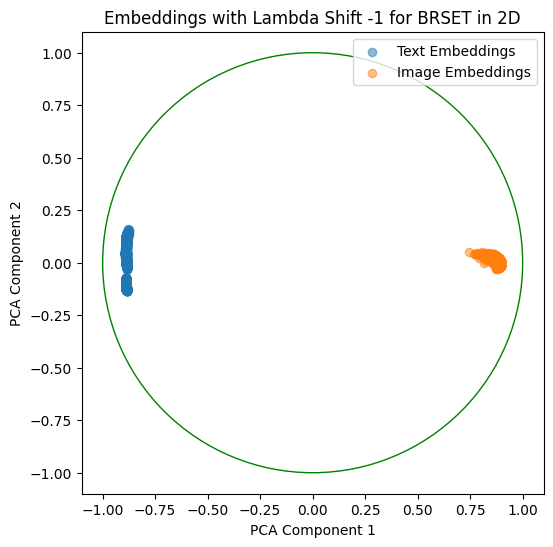

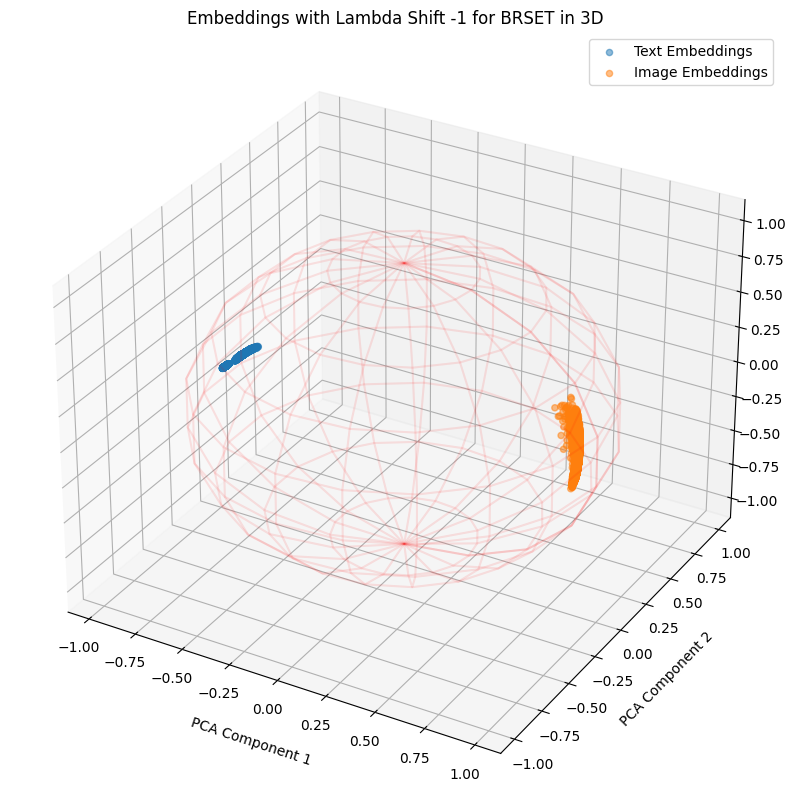

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 2.69 seconds
Total Training Time per Epoch: 134.52 seconds
Average Inference Time per Epoch: 0.38 seconds
Total Inference Time per Epoch: 19.11 seconds


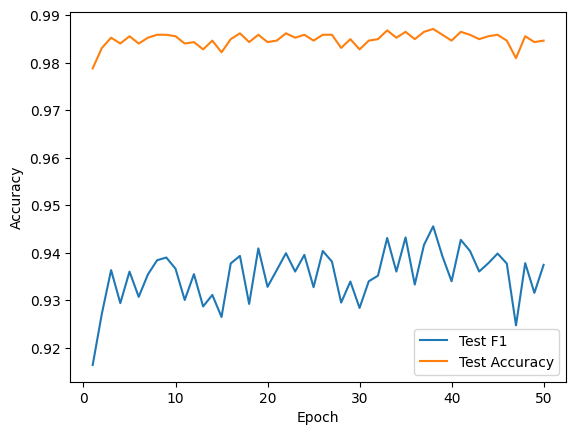

Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9455842443238285, 'Epoch': 38}
Best Macro-F1: {'Acc': 0.9870928088506453, 'F1': 0.9455842443238285, 'Epoch': 38}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 1.93 seconds
Total Training Time per Epoch: 96.59 seconds
Average Inference Time per Epoch: 0.38 seconds
Total Inference Time per Epoch: 19.08 seconds


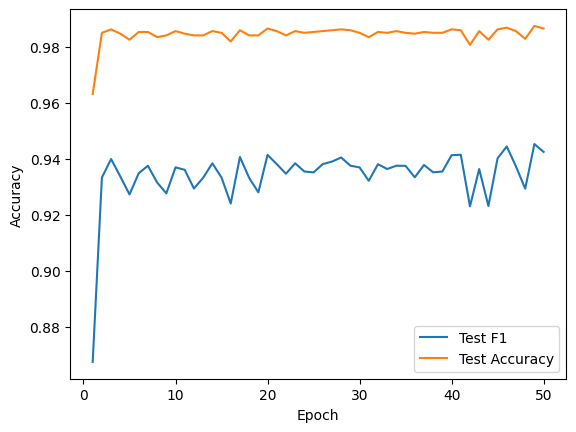

Best Accuracy: {'Acc': 0.98740012292563, 'F1': 0.9452658491867252, 'Epoch': 49}
Best Macro-F1: {'Acc': 0.98740012292563, 'F1': 0.9452658491867252, 'Epoch': 49}
##################################################  Shift -0.8  ##################################################


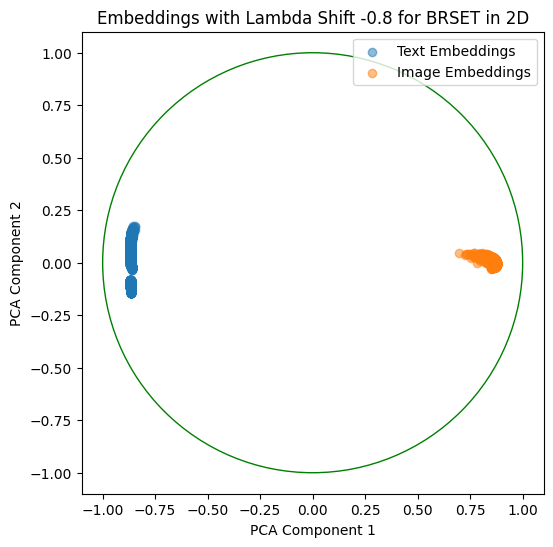

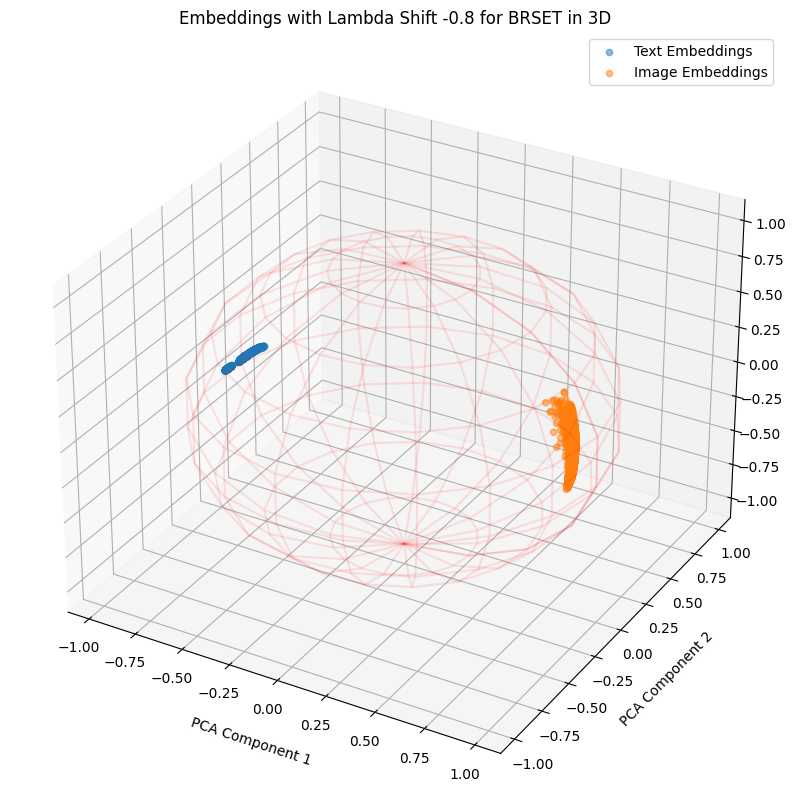

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.92 seconds
Total Training Time per Epoch: 95.86 seconds
Average Inference Time per Epoch: 0.47 seconds
Total Inference Time per Epoch: 23.27 seconds


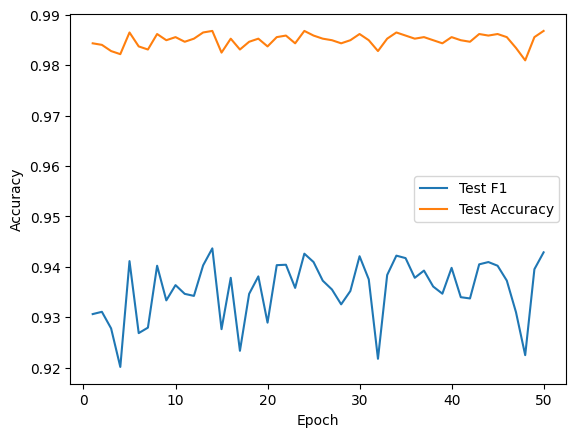

Best Accuracy: {'Acc': 0.9867854947756607, 'F1': 0.943650434717473, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.9867854947756607, 'F1': 0.943650434717473, 'Epoch': 14}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 1.98 seconds
Total Training Time per Epoch: 98.88 seconds
Average Inference Time per Epoch: 0.46 seconds
Total Inference Time per Epoch: 23.23 seconds


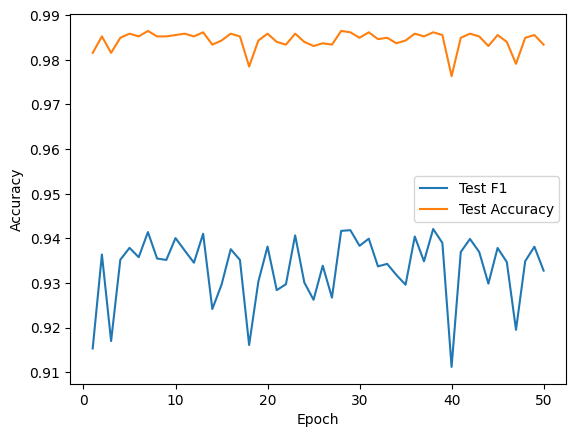

Best Accuracy: {'Acc': 0.986478180700676, 'F1': 0.9413981663392272, 'Epoch': 7}
Best Macro-F1: {'Acc': 0.9861708666256914, 'F1': 0.9420903703440051, 'Epoch': 38}
##################################################  Shift -0.6  ##################################################


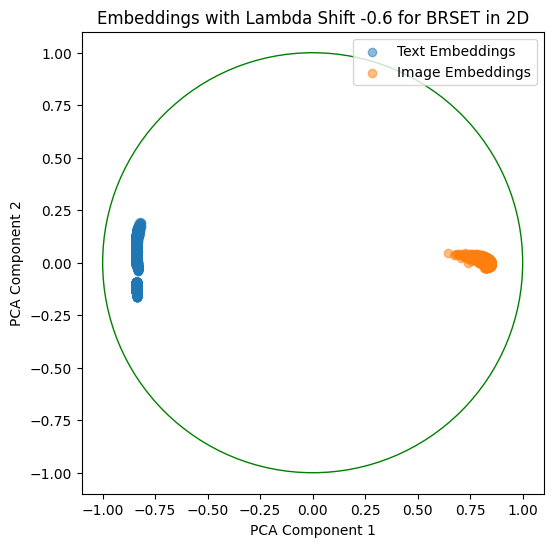

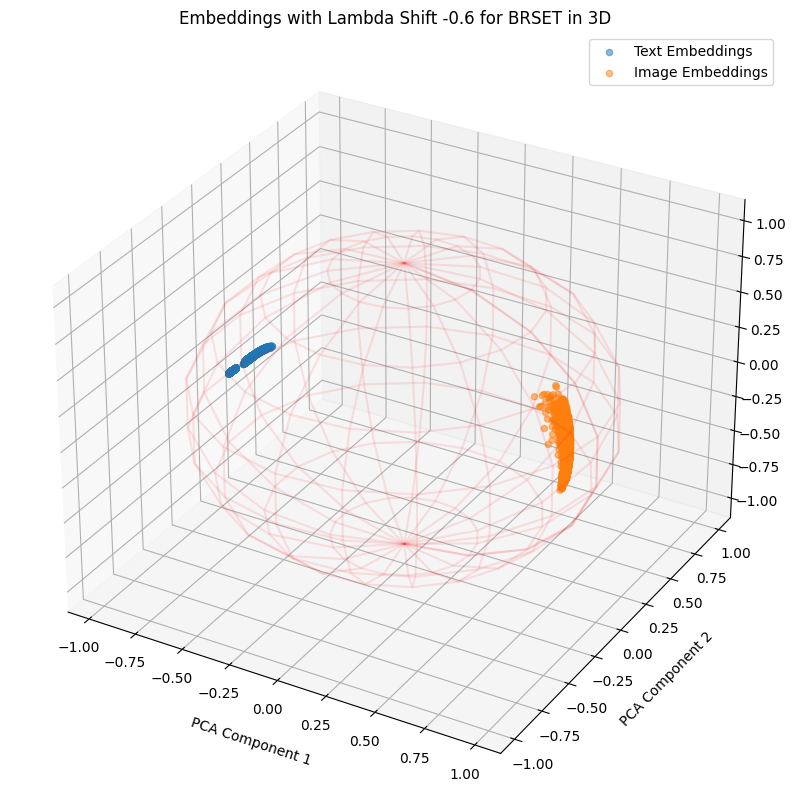

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.97 seconds
Total Training Time per Epoch: 98.57 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 24.82 seconds


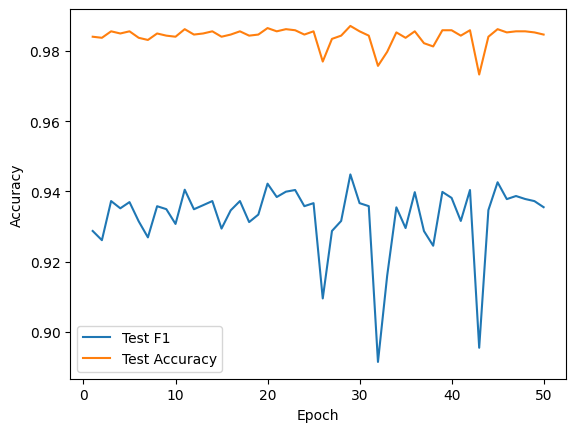

Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9448343674770285, 'Epoch': 29}
Best Macro-F1: {'Acc': 0.9870928088506453, 'F1': 0.9448343674770285, 'Epoch': 29}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 2.03 seconds
Total Training Time per Epoch: 101.29 seconds
Average Inference Time per Epoch: 0.49 seconds
Total Inference Time per Epoch: 24.67 seconds


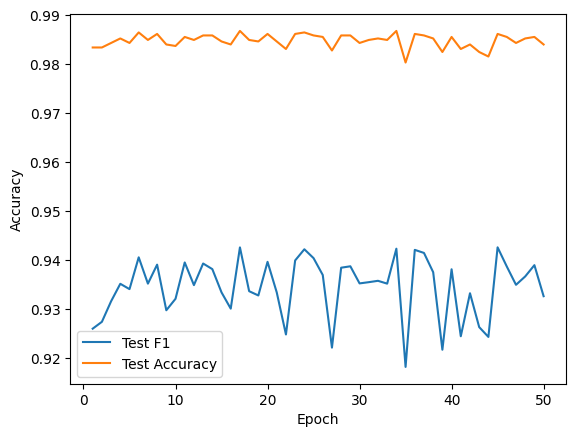

Best Accuracy: {'Acc': 0.9867854947756607, 'F1': 0.9425958906104679, 'Epoch': 17}
Best Macro-F1: {'Acc': 0.9861708666256914, 'F1': 0.9426055279464397, 'Epoch': 45}
##################################################  Shift -0.4  ##################################################


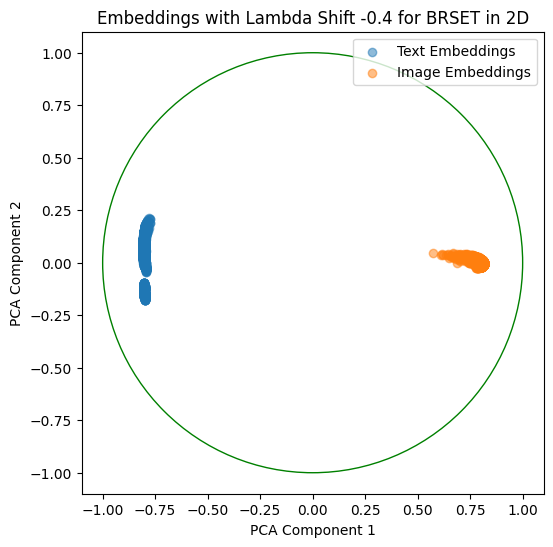

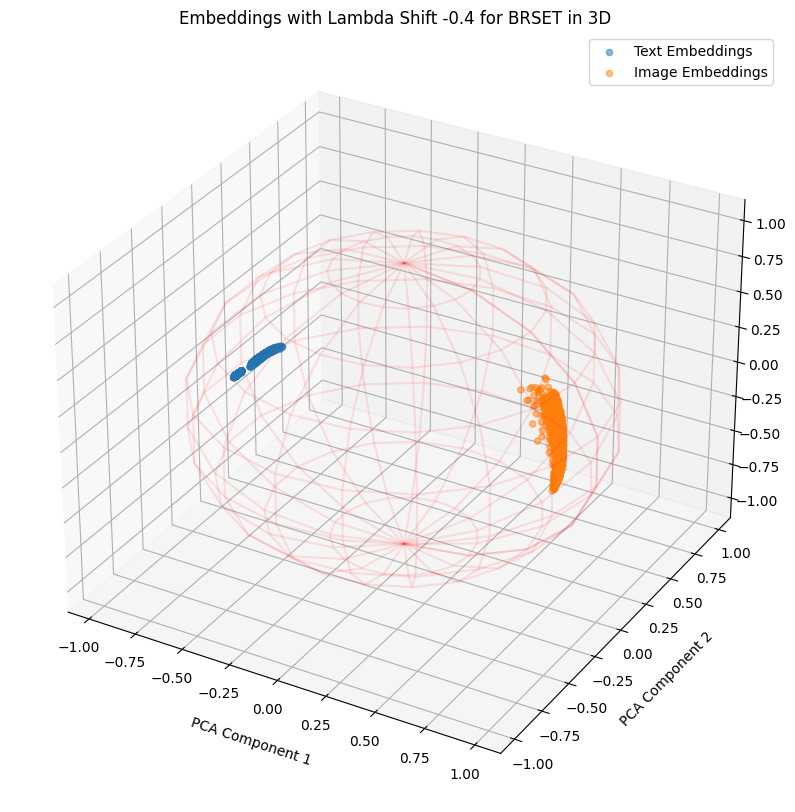

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.94 seconds
Total Training Time per Epoch: 97.24 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.08 seconds


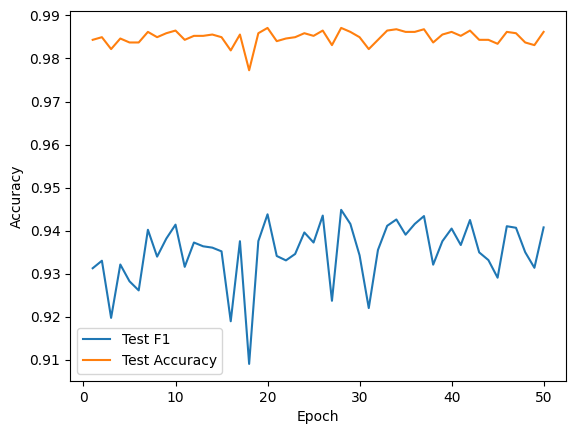

Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9437991923611512, 'Epoch': 20}
Best Macro-F1: {'Acc': 0.9870928088506453, 'F1': 0.9448343674770285, 'Epoch': 28}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 2.02 seconds
Total Training Time per Epoch: 101.08 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.02 seconds


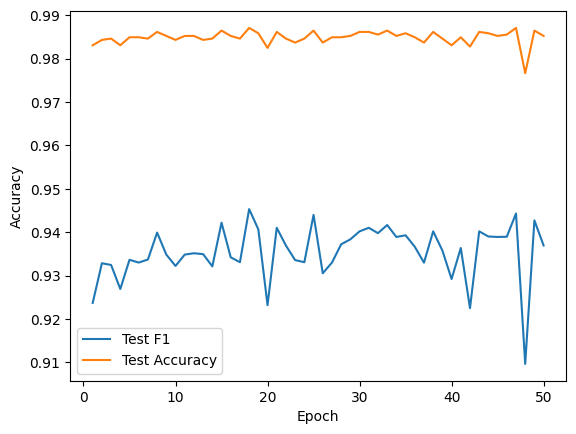

Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9453367357550257, 'Epoch': 18}
Best Macro-F1: {'Acc': 0.9870928088506453, 'F1': 0.9453367357550257, 'Epoch': 18}
##################################################  Shift -0.2  ##################################################


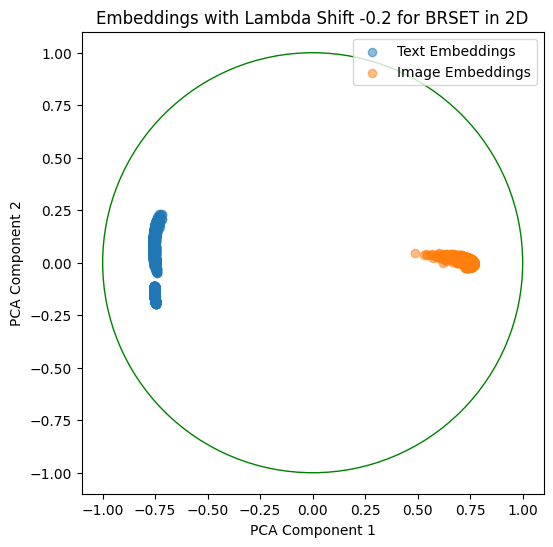

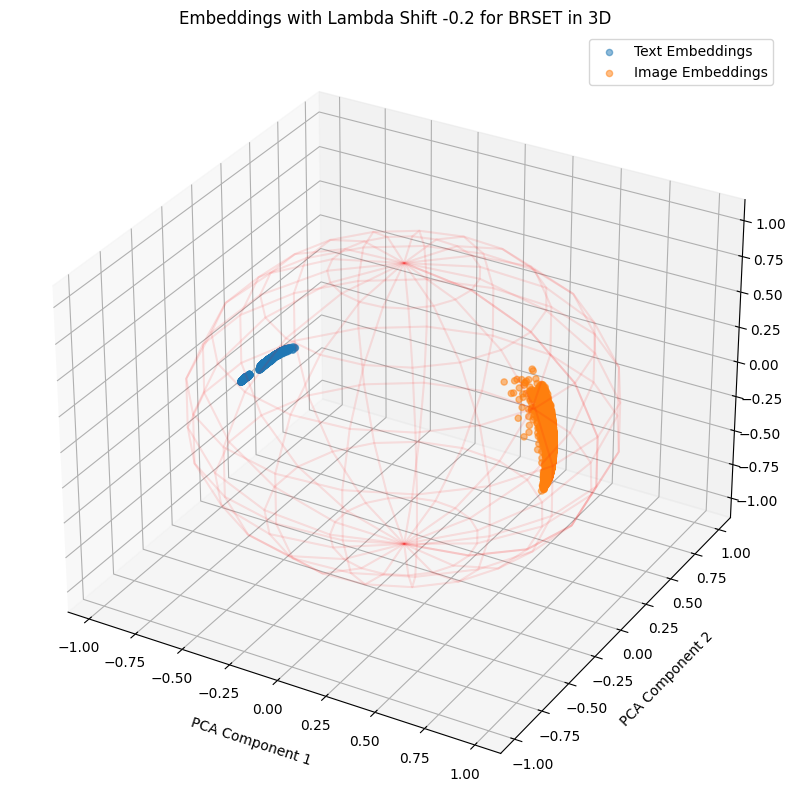

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 2.00 seconds
Total Training Time per Epoch: 99.79 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.23 seconds


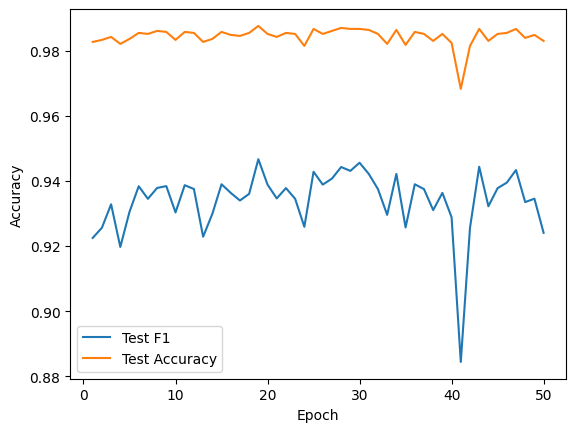

Best Accuracy: {'Acc': 0.9877074370006146, 'F1': 0.9467256057629339, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.9877074370006146, 'F1': 0.9467256057629339, 'Epoch': 19}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 2.01 seconds
Total Training Time per Epoch: 100.67 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.00 seconds


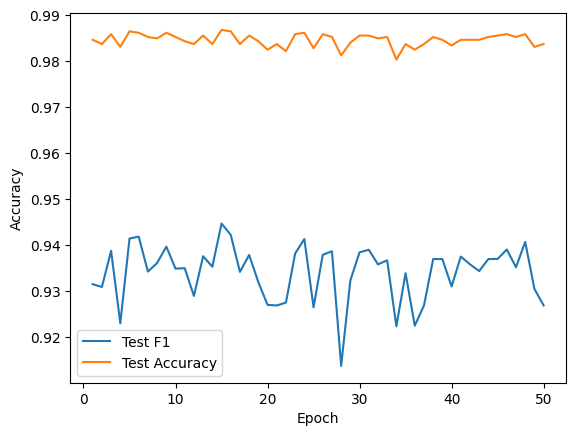

Best Accuracy: {'Acc': 0.9867854947756607, 'F1': 0.9446641316620495, 'Epoch': 15}
Best Macro-F1: {'Acc': 0.9867854947756607, 'F1': 0.9446641316620495, 'Epoch': 15}
##################################################  Shift 0  ##################################################


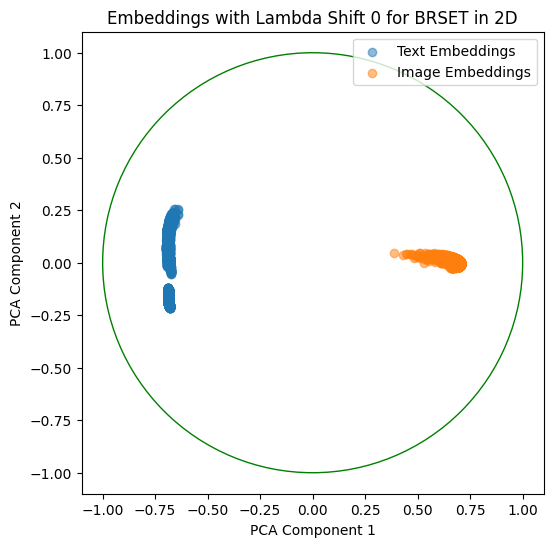

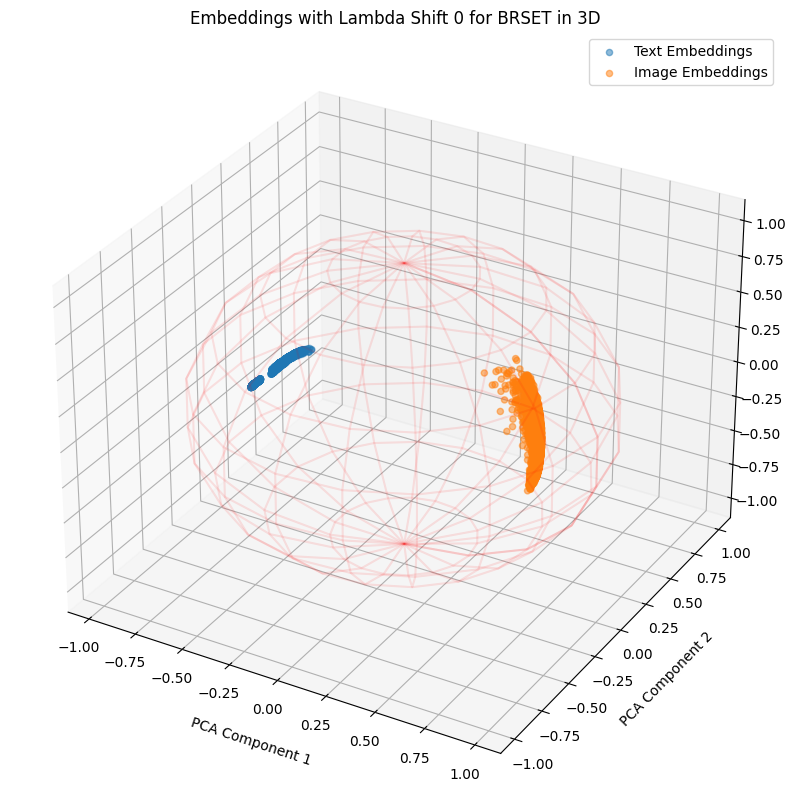

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.95 seconds
Total Training Time per Epoch: 97.60 seconds
Average Inference Time per Epoch: 0.51 seconds
Total Inference Time per Epoch: 25.54 seconds


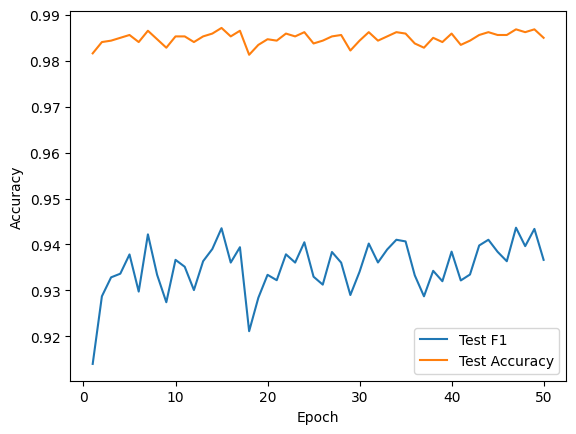

Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9435338330953514, 'Epoch': 15}
Best Macro-F1: {'Acc': 0.9867854947756607, 'F1': 0.943650434717473, 'Epoch': 47}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 1.99 seconds
Total Training Time per Epoch: 99.59 seconds
Average Inference Time per Epoch: 0.51 seconds
Total Inference Time per Epoch: 25.60 seconds


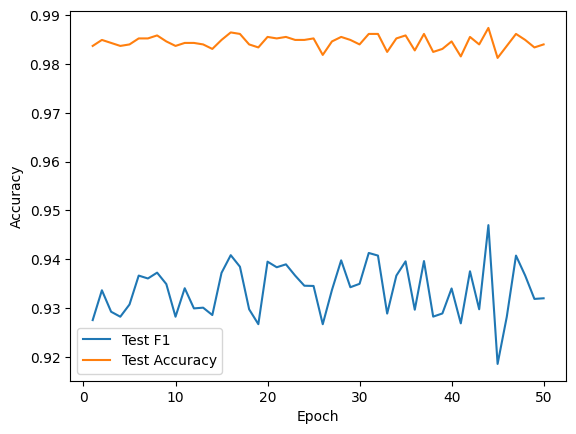

Best Accuracy: {'Acc': 0.98740012292563, 'F1': 0.946999783492602, 'Epoch': 44}
Best Macro-F1: {'Acc': 0.98740012292563, 'F1': 0.946999783492602, 'Epoch': 44}
##################################################  Shift 0.2  ##################################################


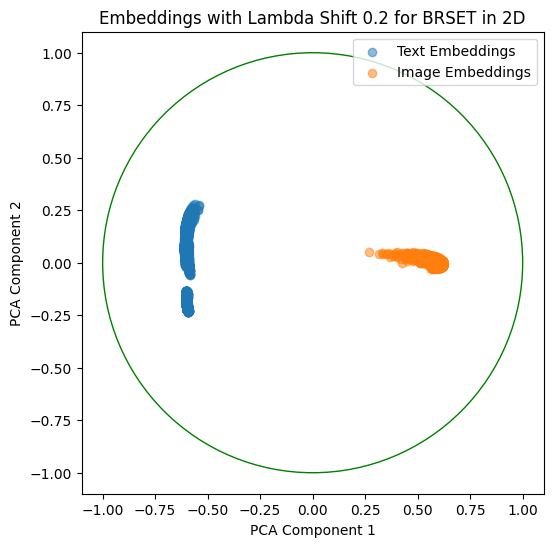

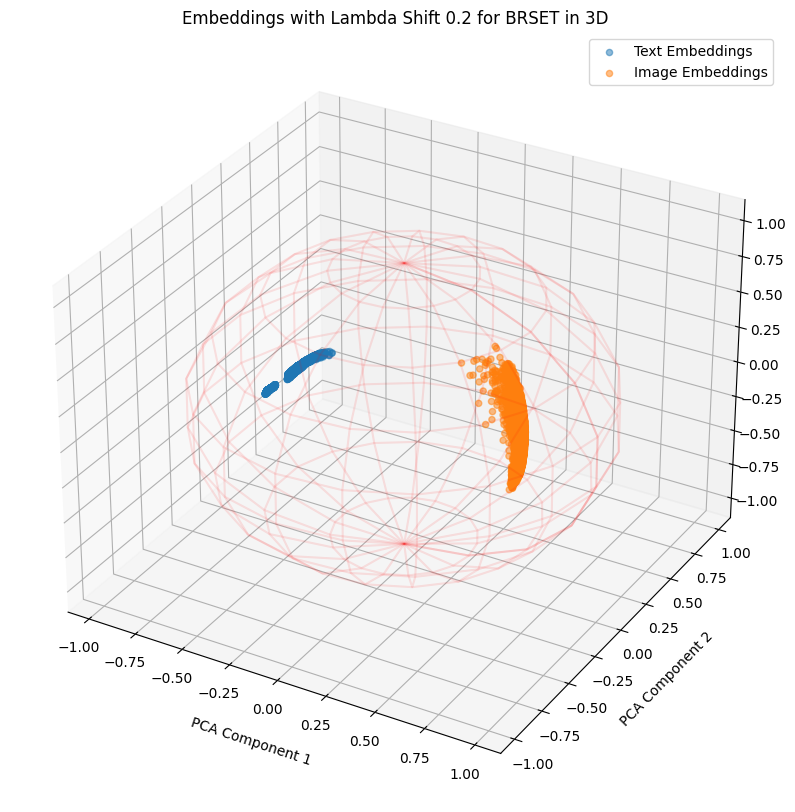

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.98 seconds
Total Training Time per Epoch: 98.84 seconds
Average Inference Time per Epoch: 0.51 seconds
Total Inference Time per Epoch: 25.31 seconds


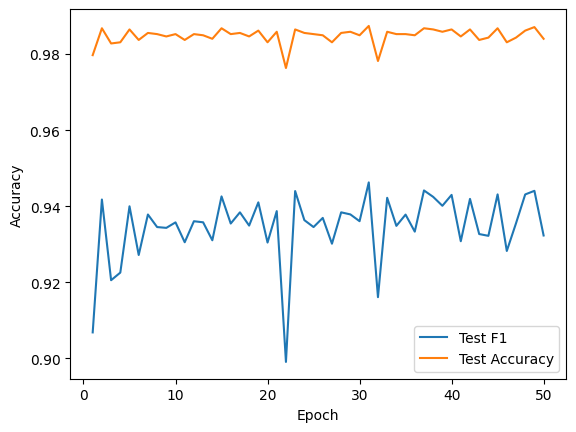

Best Accuracy: {'Acc': 0.98740012292563, 'F1': 0.9462713447306137, 'Epoch': 31}
Best Macro-F1: {'Acc': 0.98740012292563, 'F1': 0.9462713447306137, 'Epoch': 31}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 2.02 seconds
Total Training Time per Epoch: 100.99 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.12 seconds


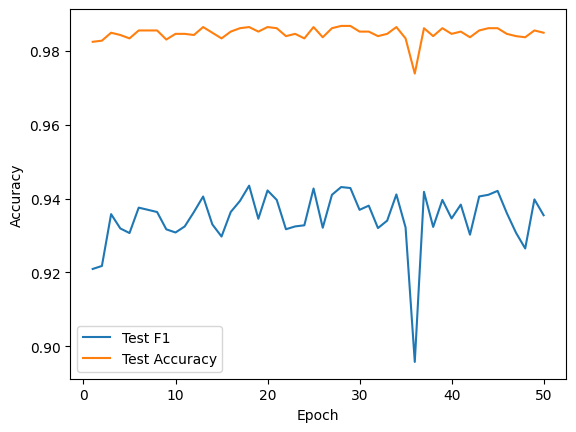

Best Accuracy: {'Acc': 0.9867854947756607, 'F1': 0.9431284205477755, 'Epoch': 28}
Best Macro-F1: {'Acc': 0.986478180700676, 'F1': 0.943504091115713, 'Epoch': 18}
##################################################  Shift 0.4  ##################################################


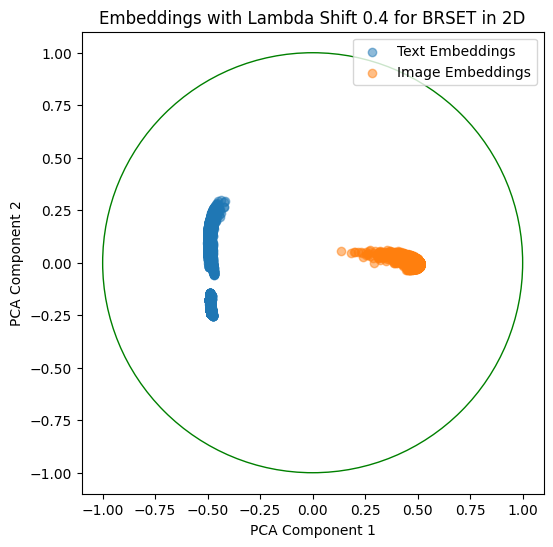

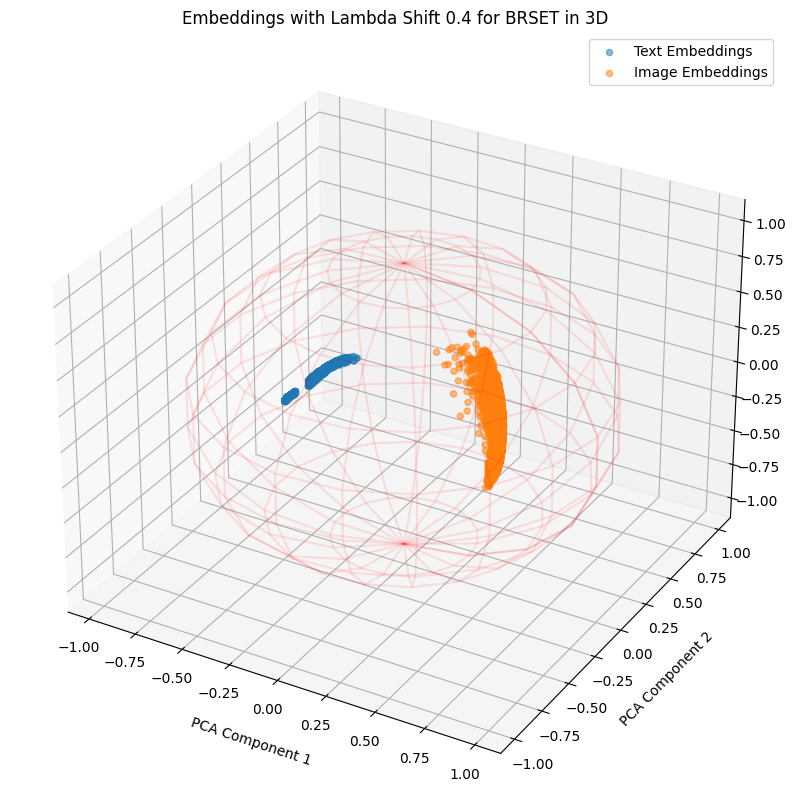

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.96 seconds
Total Training Time per Epoch: 97.76 seconds
Average Inference Time per Epoch: 0.52 seconds
Total Inference Time per Epoch: 25.86 seconds


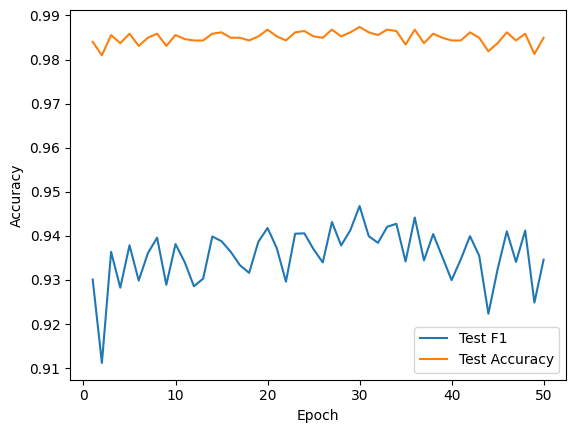

Best Accuracy: {'Acc': 0.98740012292563, 'F1': 0.9467593451687579, 'Epoch': 30}
Best Macro-F1: {'Acc': 0.98740012292563, 'F1': 0.9467593451687579, 'Epoch': 30}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 2.00 seconds
Total Training Time per Epoch: 99.82 seconds
Average Inference Time per Epoch: 0.51 seconds
Total Inference Time per Epoch: 25.62 seconds


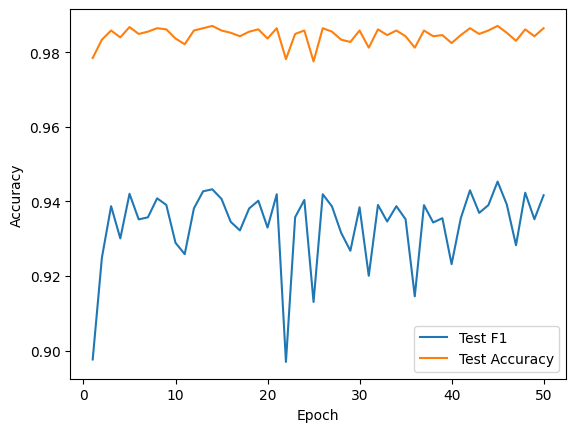

Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9432657676730944, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.9870928088506453, 'F1': 0.9453367357550257, 'Epoch': 45}
##################################################  Shift 0.6  ##################################################


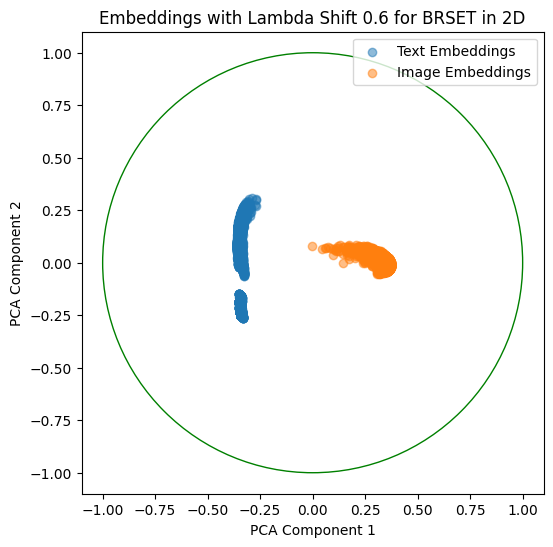

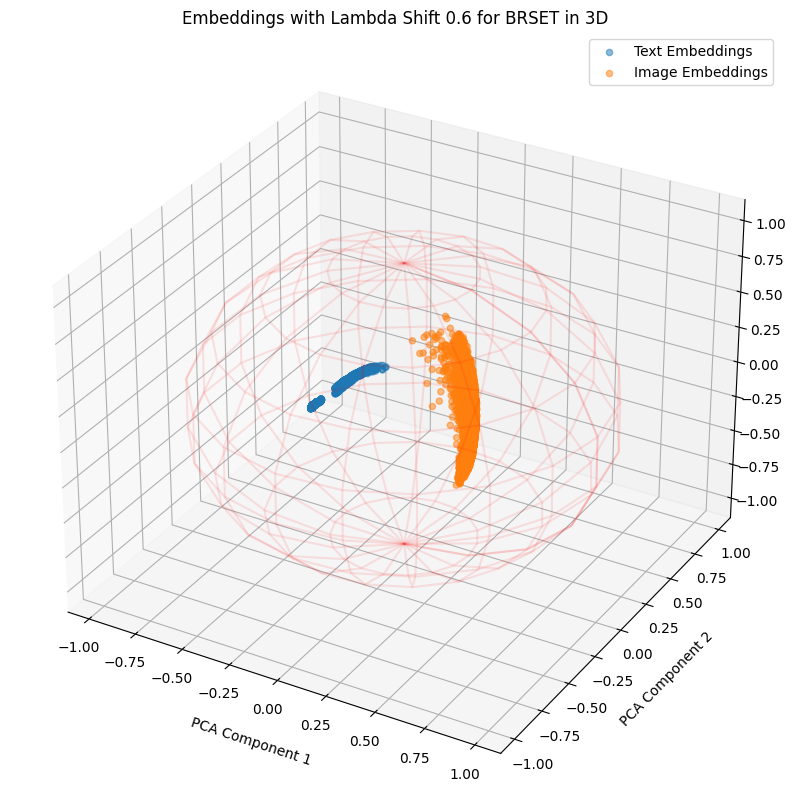

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.93 seconds
Total Training Time per Epoch: 96.68 seconds
Average Inference Time per Epoch: 0.51 seconds
Total Inference Time per Epoch: 25.60 seconds


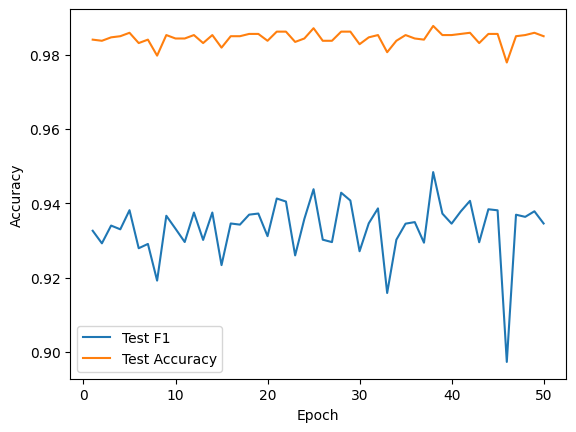

Best Accuracy: {'Acc': 0.9877074370006146, 'F1': 0.9484089046167212, 'Epoch': 38}
Best Macro-F1: {'Acc': 0.9877074370006146, 'F1': 0.9484089046167212, 'Epoch': 38}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 1.99 seconds
Total Training Time per Epoch: 99.55 seconds
Average Inference Time per Epoch: 0.51 seconds
Total Inference Time per Epoch: 25.28 seconds


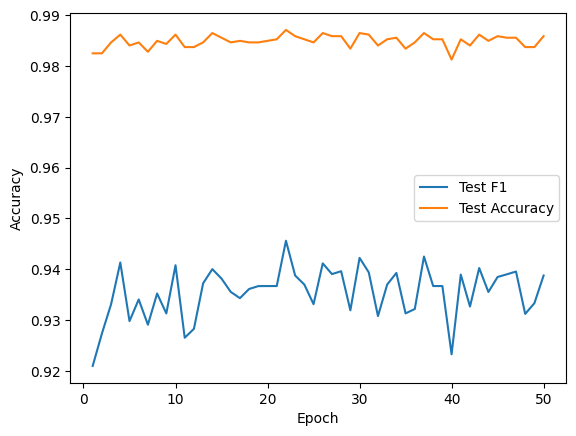

Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9455842443238285, 'Epoch': 22}
Best Macro-F1: {'Acc': 0.9870928088506453, 'F1': 0.9455842443238285, 'Epoch': 22}
##################################################  Shift 0.8  ##################################################


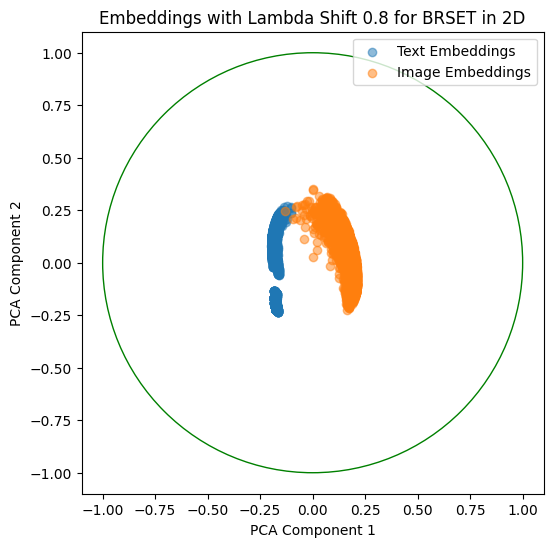

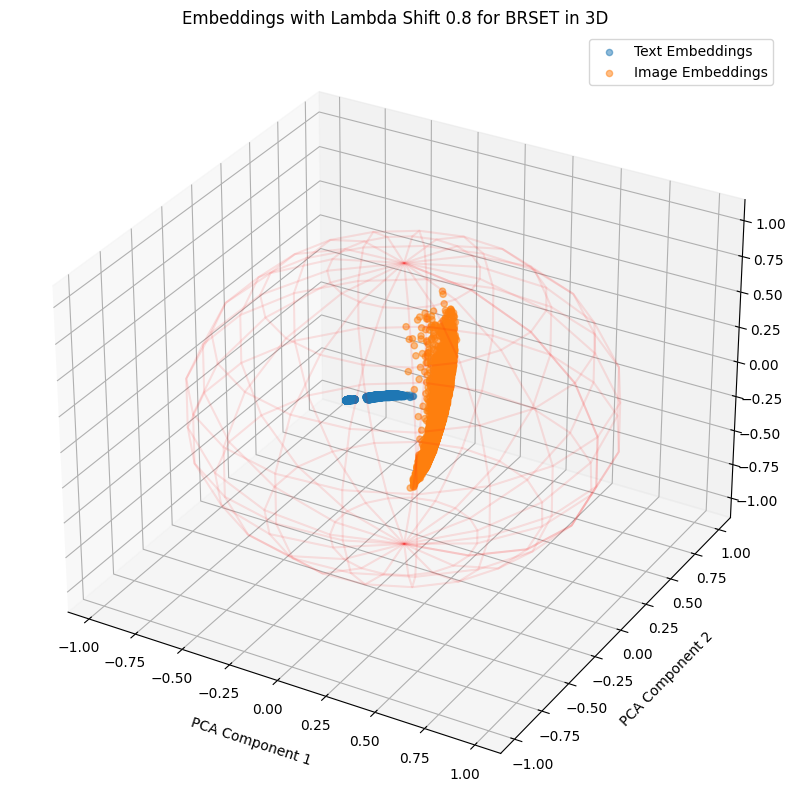

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.97 seconds
Total Training Time per Epoch: 98.42 seconds
Average Inference Time per Epoch: 0.49 seconds
Total Inference Time per Epoch: 24.68 seconds


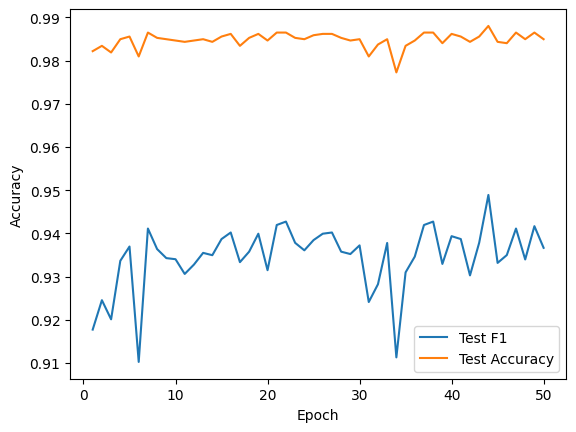

Best Accuracy: {'Acc': 0.9880147510755992, 'F1': 0.9488922547437545, 'Epoch': 44}
Best Macro-F1: {'Acc': 0.9880147510755992, 'F1': 0.9488922547437545, 'Epoch': 44}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 2.02 seconds
Total Training Time per Epoch: 101.23 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 24.89 seconds


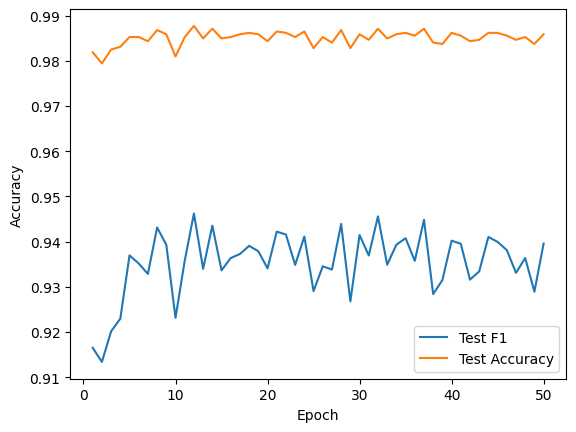

Best Accuracy: {'Acc': 0.9877074370006146, 'F1': 0.946222698186049, 'Epoch': 12}
Best Macro-F1: {'Acc': 0.9877074370006146, 'F1': 0.946222698186049, 'Epoch': 12}
##################################################  Shift 1  ##################################################


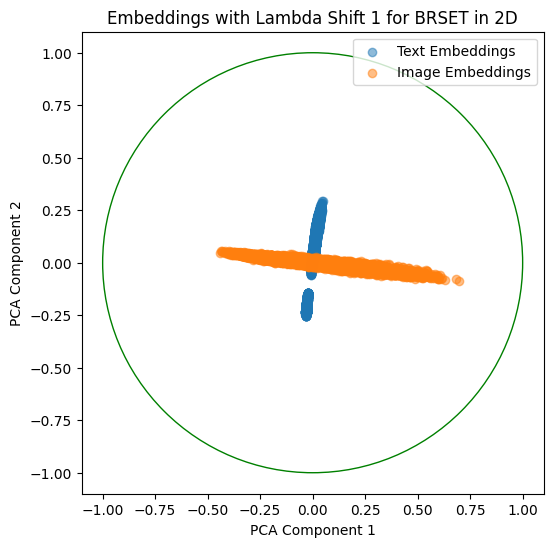

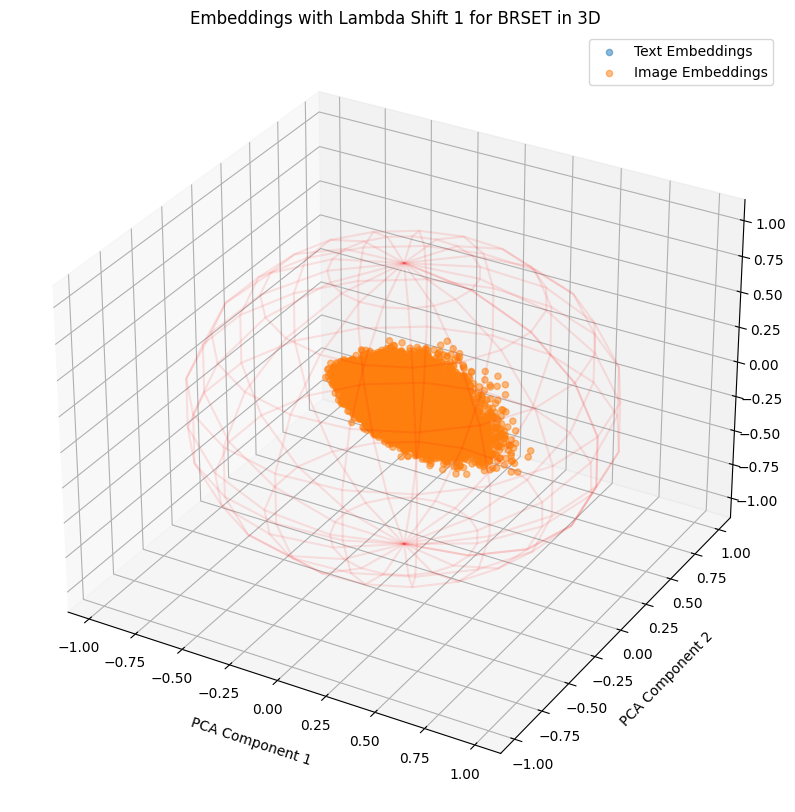

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721409
Average Training Time per Epoch: 1.93 seconds
Total Training Time per Epoch: 96.37 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.20 seconds


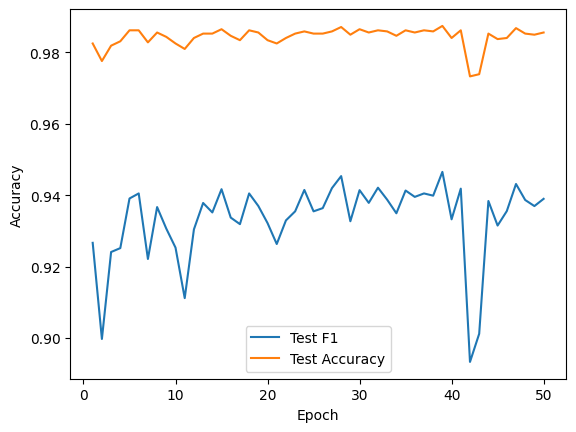

Best Accuracy: {'Acc': 0.98740012292563, 'F1': 0.9465165438560412, 'Epoch': 39}
Best Macro-F1: {'Acc': 0.98740012292563, 'F1': 0.9465165438560412, 'Epoch': 39}
Training Late Fusion Model:
The number of parameters of the model are: 360961
Average Training Time per Epoch: 2.00 seconds
Total Training Time per Epoch: 100.04 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.09 seconds


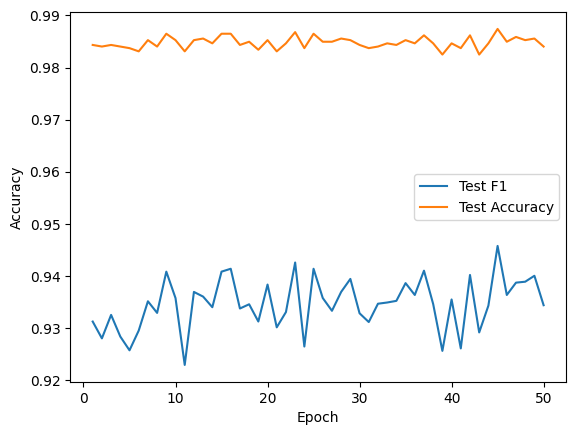

Best Accuracy: {'Acc': 0.98740012292563, 'F1': 0.9457736102897394, 'Epoch': 45}
Best Macro-F1: {'Acc': 0.98740012292563, 'F1': 0.9457736102897394, 'Epoch': 45}


In [6]:
# Assuming df is your DataFrame
#lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [7]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

Results Early Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9455842443238285, 'Epoch': 38}
Best F1: {'Acc': 0.9870928088506453, 'F1': 0.9455842443238285, 'Epoch': 38}
Shift = -0.8
Best Accuracy: {'Acc': 0.9867854947756607, 'F1': 0.943650434717473, 'Epoch': 14}
Best F1: {'Acc': 0.9867854947756607, 'F1': 0.943650434717473, 'Epoch': 14}
Shift = -0.6
Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9448343674770285, 'Epoch': 29}
Best F1: {'Acc': 0.9870928088506453, 'F1': 0.9448343674770285, 'Epoch': 29}
Shift = -0.4
Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9437991923611512, 'Epoch': 20}
Best F1: {'Acc': 0.9870928088506453, 'F1': 0.9448343674770285, 'Epoch': 28}
Shift = -0.2
Best Accuracy: {'Acc': 0.9877074370006146, 'F1': 0.9467256057629339, 'Epoch': 19}
Best F1: {'Acc': 0.9877074370006146, 'F1': 0.9467256057629339, 'Epoch': 19}
Shift = 0
Best Accuracy: {'Acc': 0.9870928088506453, 'F1': 0.9435338330953514, 'Epoch': 15}
Best F1: {'Acc': 0.986785494775660

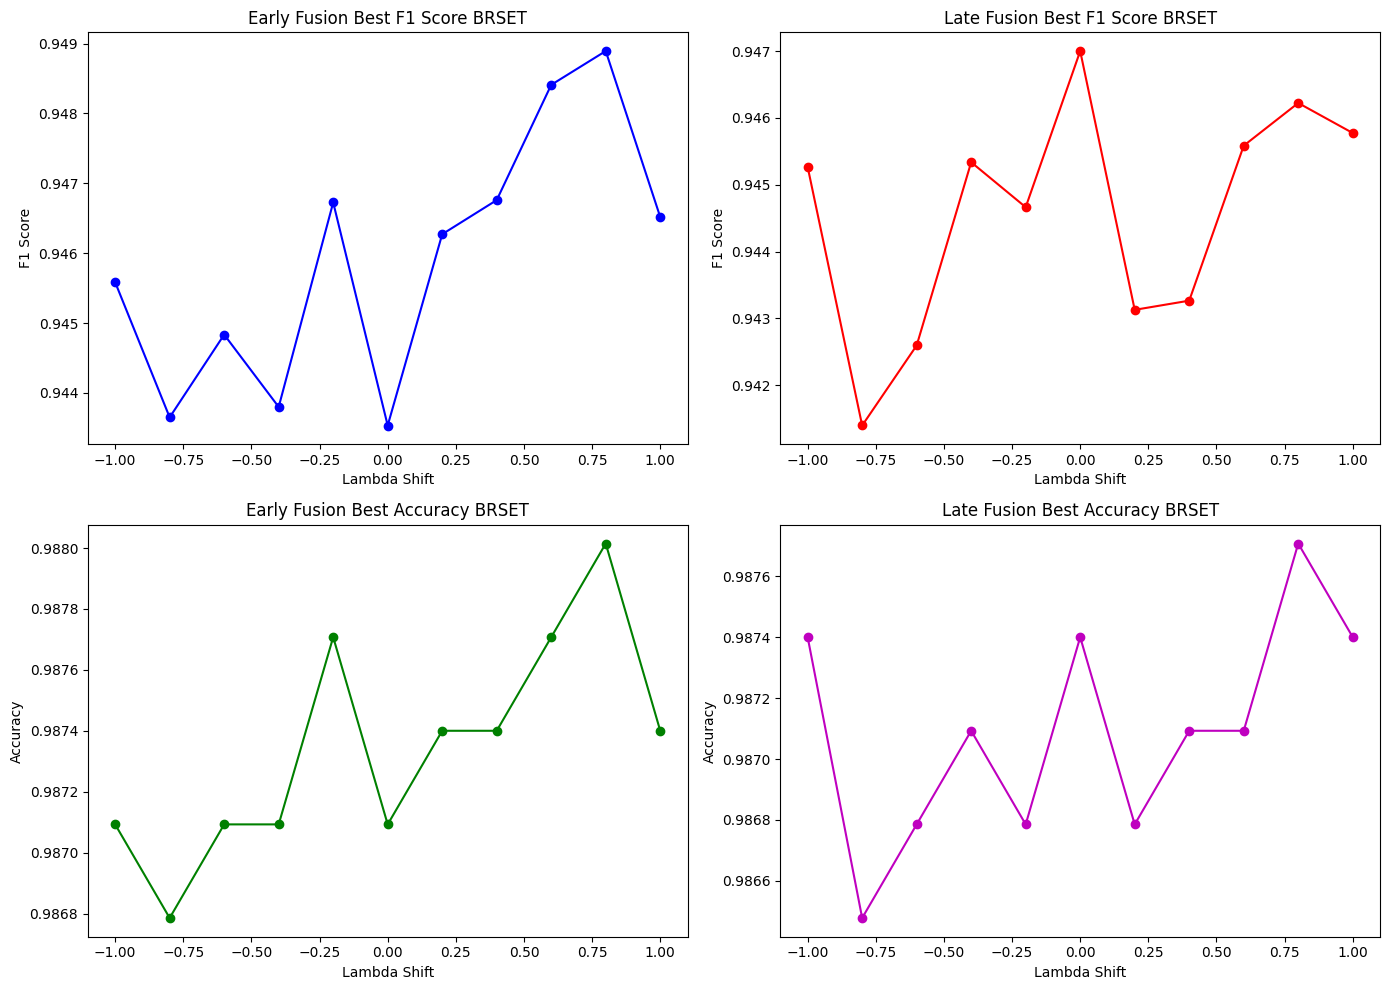

In [8]:
plot_results(results, lambda_shift_values, DATASET)